# GG274 Homework 9: Bootstrap Confidence Intervals

## Logistics

**Due date**: The homework is due 23:59 on Monday, March 18.

You will submit your work on [MarkUs](https://markus-ds.teach.cs.toronto.edu).
To submit your work:

1. Download this file (`Homework_9.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **hw9** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)
All homeworks will take place in a Jupyter notebook (like this one). When you are done, you will download this notebook and submit it to MarkUs.


## Introduction

In this homework you will construct a bootstrap confidence interval around a sample mean of time spent driving, for those people in the survey who reported ***more*** than 0 minutes of driving. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

``` 
durl313            Duration - Travel - Car - Driver

           VALUE  LABEL
               0  No time spent doing this activity
            9996  Valid skip
            9997  Don't know
            9998  Refusal
            9999  Not stated

           Data type: numeric
           Missing-data codes: 9996-9999
           Record/columns: 1/362-364
```

## Step 1 - Read the time use survey data into a `pandas` `DataFrame`

a)  The data is stored in `gss_tu2016_main_file.csv` .

Use the `pandas` function `read_csv` to read the data into a `pandas` `DataFrame` named `time_use_df`. 


In [2]:
# Write your code below
time_use_df = pd.read_csv('gss_tu2016_main_file.csv')

b) Use `time_use_df` to create a another `DataFrame` called `drive_time_df` that has two columns: `'CASEID', 'durl313'` (in that order).

In [3]:
# Write your code below
drive_time_df = time_use_df[["CASEID", "durl313"]]

drive_time_df.head()

,CASEID,durl313
0,10000,90
1,10001,0
2,10002,30
3,10003,80
4,10004,0


b) Rename the column names of `drive_time_df` using the following table. The `DataFrame` with the new column names should be called `drive_time_df` (i.e., don't change the name of the `DataFrame`).

Original column name | New column name
----|----
CASEID | ID
durl313 | drv_time


In [4]:
# Write your code below
column_names = {'CASEID': 'ID',
                'durl313': 'drv_time'}

drive_time_df = drive_time_df.rename(columns=column_names)

## Step 2 - Select only those participants who drove and create new `pandas` `DataFrame`.

a) In this step you will select only those survey participants who drove (i.e., their drv_time value is greater than 0 and not 9996, 9997, 9998, or 9999. 

First, create a `pandas` `Series` called `driver` where a value is `True` if the person drove and `False` if they did not.

In [5]:
# Write your code below

driver = (drive_time_df["drv_time"] > 0) & (drive_time_df["drv_time"] < 9996)

b) Create a new `DataFrame` `subset_drive_time_df` by selecting the rows in `drive_time_df` where the person drove.

In [6]:
# Write your code below
subset_drive_time_df = drive_time_df[driver]

## Step 3 - Calculate the mean of how much time drivers spent driving  

In this step you will compute the mean of how much time drivers spent driving and store it in a variable called `drive_time_avg`. 

In [7]:
# Write your code below

drive_time_avg = subset_drive_time_df['drv_time'].mean()


## Step 4 - Create a function that generates a bootstrap sample from `subset_drive_time_df`

In the below cell, create a function called `one_bs_mean` that calculates a bootstrap sample mean called `dt_bsmean_sample` from `subset_drive_time_df`. 

In [9]:
# Write your code below

def one_bs_mean():
    dt_bsmean_sample = subset_drive_time_df['drv_time'].sample(frac = 1, replace=True).mean()
    return dt_bsmean_sample

# test your function
one_bs_mean()

74.5740412979351

## Step 5 - Compute a distribution of bootstrap sample means

a) Create an empty list called `bootstrap_means` and then a loop that populates this list with 10,000 bootstrap sample means (generated from calling your `one_bs_mean` function).

In [10]:
# This code sets a random seed so the code below generates the same results
# Don't change this!
np.random.seed(901)

# Write your code below
bootstrap_means = []
for _ in range(10000):
    bootstrap_means.append(one_bs_mean())

b) Plot `bootstrap_means` as a histogram using a `color` argument of `cyan` and `edgecolor` of `red`. Save the histogram to `bootstrap_means_histogram`.

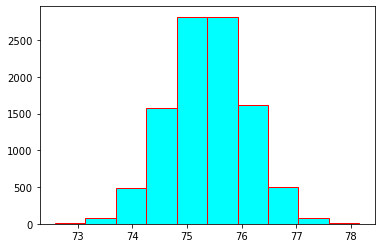

In [13]:
# Write your code below
bootstrap_means_histogram = plt.hist(bootstrap_means, color = 'cyan', edgecolor = 'red')

## Step 6 - Report the 95% confidence interval of the sample mean of how much time drivers spend driving

a) Compute the 2.5th percentile from the distribution `bootstrap_means` using the `np.percentile()`. Save the percentile to `bootstrap_means_2p5_percentile`.

In [36]:
# Write your code below
bootstrap_means_2p5_percentile = np.percentile(bootstrap_means, 2.5)

bootstrap_means_2p5_percentile

73.98493117010815

b) Compute the 97.5th percentile from the distribution `bootstrap_means` using the `np.percentile()`. Save the percentile to `bootstrap_means_97p5_percentile`.

In [20]:
# Write your code below
bootstrap_means_97p5_percentile = np.percentile(bootstrap_means, 97.5)

bootstrap_means_97p5_percentile

76.78839724680432

c) Complete the following sentence reporting the 95% bootstrap confidence interval, rounded to two decimal points.


**write answer here**

ANSWER: A 95% bootstrap confidence interval for the sample mean of driving time for drivers is 73.98 to 76.79 minutes. 

**Give this to students:** "A 95% bootstrap confidence interval for the sample mean of driving time for drivers is __ to __ minutes.